<a href="https://colab.research.google.com/github/maberf/colabs/blob/main/DerivativosEx2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# importação dos pacotes
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random

In [17]:
# inputs - variáveis e valores
to = 0
ro = 0.15 # valor do underlying
k = 1.5
req = 0.40
sigma = 0.40 # valor da volatilidade em numérico de %
alpha = 1.0 # valor de média em numérico de %
t = 1 # período em anos

In [18]:
# parâmetros adicionais para a simulação do exercício
dt = 1/252 # base dia para ano base 252
flows = 80 # quantidade de fluxos
#
data = {'N': range(t*(252+1))} # 1 incremento a mais para fechar em ano(s)

In [19]:
# criação do dataframe
df = pd.DataFrame(data)
# carregamento da coluna com os incrementos de tempo
df['t'] = df['N'] * dt
# print(df)

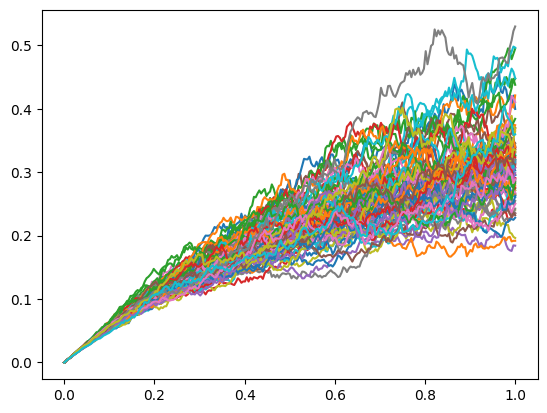

In [20]:
# recorrências aninhadas, fluxos, cálculos no dataframe e plotagem dos fluxos
# fluxos
for r in range(0, flows):
    flow = 'R'+str(r)
    df[flow] = to
    df[flow] = df['R'+str(r)].astype(float)
    # recorrência do cálculo no dataframe
    for i in range(1, len(df)):
        rt = df.iloc[i - 1, r+2]
        df.iloc[i, r+2] = rt+k*(req-rt)*dt+sigma*rt**(alpha)*stats.norm.ppf(random.random(), loc=0, scale=math.sqrt(dt))
    # plotagem dos fluxos
    plt.plot(df['t'], df[flow], label=flow)
# acréscimo de legendas no gráfico
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
# print(df)

(array([ 3.,  0.,  4.,  4.,  8.,  8., 10., 11., 12.,  4.,  6.,  1.,  1.,
         2.,  1.,  2.,  0.,  1.,  1.,  1.]),
 array([0.18414151, 0.20141673, 0.21869194, 0.23596715, 0.25324237,
        0.27051758, 0.2877928 , 0.30506801, 0.32234322, 0.33961844,
        0.35689365, 0.37416886, 0.39144408, 0.40871929, 0.42599451,
        0.44326972, 0.46054493, 0.47782015, 0.49509536, 0.51237057,
        0.52964579]),
 <BarContainer object of 20 artists>)

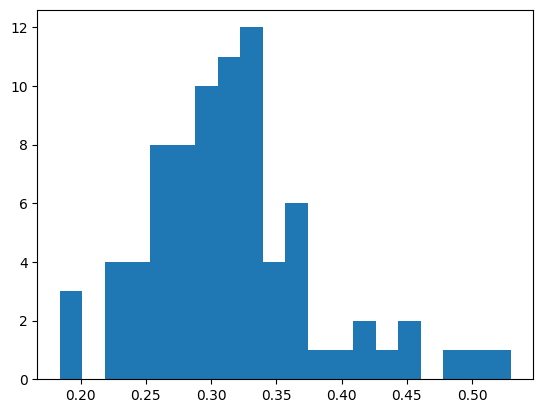

In [21]:
#plotagem histograma t = T
lastrow = t*252
plt.hist(df.iloc[lastrow, 2:], bins=20)